In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flat_chesss = cv2.imread("DATA/flat_chessboard.png")
flat_chesss = cv2.cvtColor(flat_chesss,cv2.COLOR_BGR2RGB)

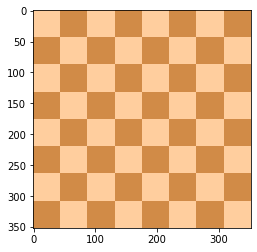

In [3]:
plt.imshow(flat_chesss)

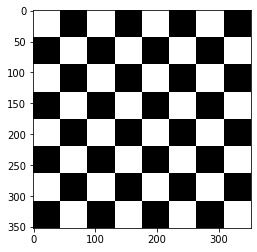

In [4]:
gray_flat_chess = cv2.cvtColor(flat_chesss,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

In [5]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

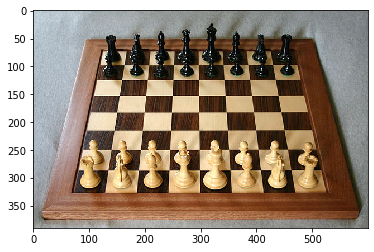

In [6]:
plt.imshow(real_chess)

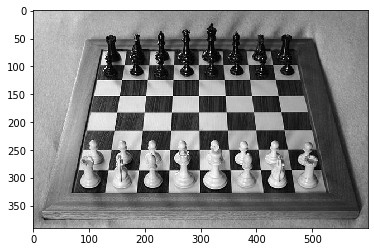

In [7]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

In [8]:

gray_flat_chess

array([[197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197]], dtype=uint8)

In [9]:
# we want the floating point number for edge detrection that's why we convert into float32
gray = np.float32(gray_flat_chess)

In [10]:
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [11]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04) # blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs )
# ksize Aperture parameter for the Sobel operator.
# k Harris detector free parameter

In [12]:
dst = cv2.dilate(dst, None) 
# Dilates is morpholic operator
# Dilates means streching the image
# Dilates an image by using a specific structuring element

In [13]:
flat_chesss[dst > 0.01*dst.max()] = [255,0,0] # RGB
# 0.01*dst.max() THIS IS MEANS 1%
# whatever dst(harris image) is grater then 1% assisgn the corner

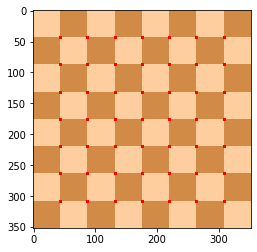

In [14]:
plt.imshow(flat_chesss)

In [15]:
# now real chess board

In [18]:
gray1 = np.float32(gray_real_chess)


In [19]:
dst1 = cv2.cornerHarris(src=gray1, blockSize=2, ksize=3, k=0.04)

In [20]:
dst1 = cv2.dilate(dst1,None)

In [21]:
real_chess[dst1>0.01*dst1.max()] = [255,0,0]

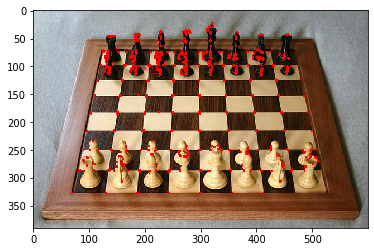

In [22]:
plt.imshow(real_chess)

In [23]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2BGR)

flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2BGR)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [31]:
corner = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10) # maxCorners is 5 means how many corner we want to detect and if we write -1 then it will detect all the corners
# it's default value
# qualityLevel = 0.01
# minDistance = 10

In [32]:
# it's in float so we need to convert it into integer because unlike cornerHarris we have to manualy draw a circle
corner = np.int0(corner)

In [33]:
corner

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]],

       [[ 88, 308]],

       [[ 44, 308]],

       [[308, 264]],

       [[264, 264]],

       [[220, 264]],

       [[176, 264]],

       [[132, 264]],

       [[ 88, 264]],

       [[ 44, 264]],

       [[308, 220]],

       [[264, 220]],

       [[220, 220]],

       [[176, 220]],

       [[132, 220]],

       [[ 88, 220]],

       [[ 44, 220]],

       [[308, 176]],

       [[264, 176]],

       [[220, 176]],

       [[176, 176]],

       [[132, 176]],

       [[ 88, 176]],

       [[ 44, 176]],

       [[308, 132]],

       [[264, 132]],

       [[220, 132]],

       [[176, 132]],

       [[132, 132]],

       [[ 88, 132]],

       [[ 44, 132]],

       [[308,  88]],

       [[264,  88]],

       [[220,  88]],

       [[176,  88]],

       [[132,  88]],

       [[ 88,  88]],

       [[ 44,  88]],

       [[308,  44]],

       [[264,  44]],

       [[220,  44]],

       [[1

In [34]:
for i in corner:
    x,y = i.ravel() # it flattern out the array
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

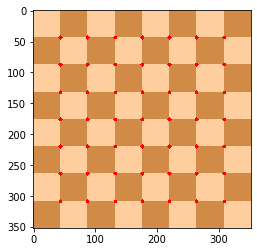

In [35]:
plt.imshow(flat_chess)

In [44]:
corner = cv2.goodFeaturesToTrack(gray_real_chess,90,0.01,10)

In [45]:
corner = np.int0(corner)

In [46]:
for i in corner:
    x,y = i.ravel() # it flattern out the array
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)

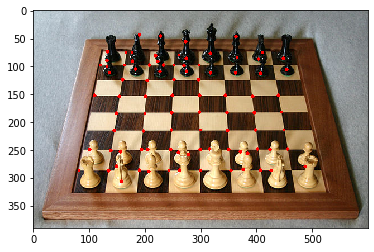

In [47]:
plt.imshow(real_chess)